In [1]:
from sklearn import datasets
import pandas as pd

In [2]:
data = datasets.load_boston()
print data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [56]:
boston_data = pd.DataFrame(data.data,columns = data.feature_names)
boston_data['PRICE'] = data.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
Price = intercept + a*CRIM + b*ZN + c*CHAS ......

In [19]:
print boston_data.shape
boston_data.describe()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [57]:
from sklearn import linear_model
X = boston_data.drop('PRICE',axis=1)
y = boston_data['PRICE']
lm = linear_model.LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
print "Intercept: ",lm.intercept_
print "Coeff: ",lm.coef_

 Intercept:  36.4911032804
Coeff:  [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]


In [37]:
print "Actual: " , list(y[:5])
print "Predictions: ", lm.predict(X[:5])

Actual:  [24.0, 21.600000000000001, 34.700000000000003, 33.399999999999999, 36.200000000000003]
Predictions:  [ 30.00821269  25.0298606   30.5702317   28.60814055  27.94288232]


In [40]:
print "R-Square: ", lm.score(X,y)

R-Square:  0.740607742865


In [44]:
import numpy as np
y_pred = lm.predict(X)
print "Mean Squared Error:", np.mean((y-y_pred)**2)
print "Root Mean Squared Error:", np.sqrt(np.mean((y-y_pred)**2))

Mean Squared Error: 21.8977792177
Root Mean Squared Error: 4.67950630064


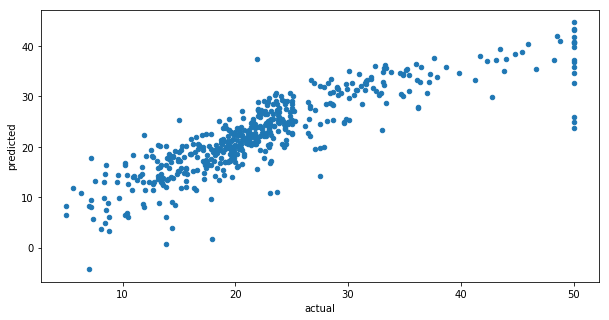

In [86]:
%matplotlib inline
pred_vs_actual = pd.DataFrame(zip(y,y_pred),columns=['actual','predicted'])
pred_vs_actual.plot.scatter('actual','predicted',figsize=(10,5))

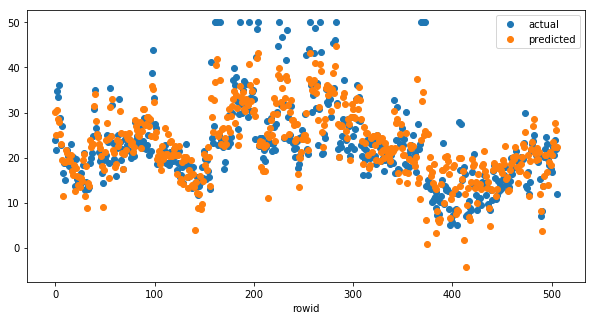

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(pred_vs_actual.index,pred_vs_actual.actual,label="actual")
plt.scatter(pred_vs_actual.index,pred_vs_actual.predicted,label="predicted")
plt.xlabel("rowid")
plt.legend()

In [90]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.20, random_state=22)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(404, 13)
(102, 13)
(404L,)
(102L,)


In [91]:
lm2 = linear_model.LinearRegression()
lm2.fit(X_train,y_train)
print "Intercept: ",lm2.intercept_
print "Coeff: ",lm2.coef_

Intercept:  32.4446525211
Coeff:  [ -9.91475223e-02   4.67274075e-02  -2.02625202e-02   3.58381050e+00
  -1.71549567e+01   3.91773225e+00  -5.61459225e-03  -1.54805870e+00
   2.96151924e-01  -1.00630836e-02  -7.79420087e-01   9.97151065e-03
  -5.26264429e-01]


In [93]:
print "Actual: " , list(y_test[:5])
print "Predictions: ", lm2.predict(X_test[:5])

 Actual:  [23.899999999999999, 29.899999999999999, 24.5, 27.5, 18.399999999999999]
Predictions:  [ 27.62934247  31.43690634  20.61035443  32.14086508  19.54518512]


In [94]:
print "R-Square train: ", lm2.score(X_train,y_train)
print "R-Square test: ", lm2.score(X_test,y_test)

R-Square train:  0.729521905264
R-Square test:  0.765802051446


In [95]:
y_pred_test = lm2.predict(X_test)
y_pred_train = lm2.predict(X_train)
print "Train Mean Squared Error:", np.mean((y_train-y_pred_train)**2)
print "Train Root Mean Squared Error:", np.sqrt(np.mean((y_train-y_pred_train)**2))
print "Test Mean Squared Error:", np.mean((y_test-y_pred_test)**2)
print "Test Root Mean Squared Error:", np.sqrt(np.mean((y_test-y_pred_test)**2))

Train Mean Squared Error: 22.5405956863
Train Root Mean Squared Error: 4.74769372288
Train Mean Squared Error: 20.7657675381
Train Root Mean Squared Error: 4.55694717306


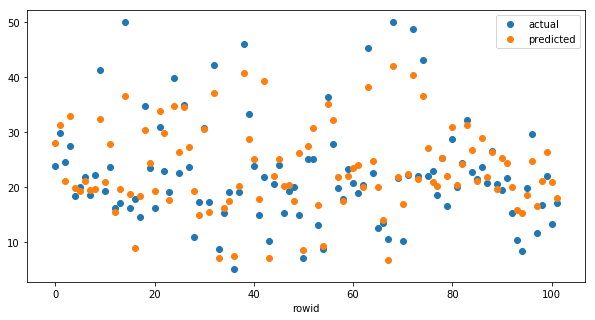

In [98]:
pred_vs_actual_test = pd.DataFrame(zip(y_test,y_pred_test),columns=['actual','predicted'])
plt.figure(figsize=(10,5))
plt.scatter(pred_vs_actual_test.index,pred_vs_actual_test.actual,label="actual")
plt.scatter(pred_vs_actual_test.index,pred_vs_actual_test.predicted,label="predicted")
plt.xlabel("rowid")
plt.legend()